<a href="https://colab.research.google.com/github/mx60s/neural-computation/blob/main/Module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## General Setup for Python

####A brief note on Google Colab

Colab sets up a collaborative coding environment inside your Google Drive.

When you start a new notebook you'll need to give it all of the tools to run your code, like installing packages and making sure it can find any files you might need.

You can run a cell by hitting the play button on its top left side or by hitting Shift+Enter (run the cell and advance the cursor to the next one). You can also hit Ctrl+F9 to run all of them. If you want to collapse a section, click on the arrow to the left of the title.

We can use packages to avoid implementing everything ourselves.
Pip is the most common package manager for python.

**Numpy** (pronounced num-pie (but really nuhm-pee if you're cool)) is a fundamental package which handles arrays, matrices, and has a bunch of useful math functions built in.

**Scikit-learn** and **Scipy** are also well known and implement a lot of basic machine learning functions.

**Matplotlib** is a powerful package for figures. One thing you should know is that probably the best possible use for ChatGPT right now is generating complicated Matplotlib plots.

If the output here is too long, you can click on View > Show/Hide Output.

In [ ]:
!pip install numpy scikit-learn matplotlib scipy

## Numpy cheat sheet

Here are just a few core functions you might end up using with numpy.

In [ ]:
import numpy as np  # Ask our python interpreter to bring numpy's functions into our space (under the name np, for brevity)

In [ ]:
"""
Initializing Arrays
"""
# Setting up a filled array (you can see we just wrap a list)
a = np.array([1, 2, 3, 5, 8, 13])
b = np.array([])

# We can initialize other filled arrays
zeros_array = np.zeros((2, 3))  # 2x3 array of zeros
ones_array = np.ones((3,4))

# Create an array with a specified range and step, or ask numpy to evenly space it for you
range_array = np.arange(0, 10, 2)       # 0 to 10 in steps of size 2
linspace_array = np.linspace(0, 1, 5)   # 0 to 1 in 5 steps

print(range_array)
print(linspace_array)

[0 2 4 6 8]
[0.   0.25 0.5  0.75 1.  ]


In [ ]:
"""
Array manipulation
"""

# Change the shape of an array
reshaped_array = a.reshape((3, 2))
print("Reshaped A:")
print(reshaped_array)

# Join a sequence of arrays along an existing axis
array_1 = np.array([[1, 2], [3, 4]])
array_2 = np.array([[5, 6]])
concatenated_array = np.concatenate((array_1, array_2), axis=0)
print('\nConcatenated Array:')
print(concatenated_array)

# Split array
array_to_split = np.arange(9)
split_arrays = np.split(array_to_split, 3)
print('\nSplit array')
print(split_arrays)

Reshaped A:
[[ 1  2]
 [ 3  5]
 [ 8 13]]

Concatenated Array:
[[1 2]
 [3 4]
 [5 6]]

Split array
[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]


In [ ]:
"""
Array indexing and slicing
"""
# Indexing
a = np.array([1, 2, 3, 4, 5])
first_element = a[0]

# Slicing
sub_array = a[1:4]  # Elements from index 1 to 3
print("A from index 1-4:")
print(sub_array)

# Boolean Indexing: Accessing elements based on a condition
condition_array = a > 2
filtered_array = a[condition_array]  # Array of elements greater than 2
print("\nParts of A greater than 2:")
print(filtered_array)

A from index 1-4:
[2 3 4]

Parts of A greater than 2:
[3 4 5]


##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression   # Scikit-Learn is pretty big, we just need this for now

In [ ]:
# Say you have some intuition that your quiz scores go up in class if you've eaten a higher number of apples the day before

# Here's our scores across a few quizzes. We have one score per quiz for 7 quizzes
y = np.array([90, 88, 75, 96, 100, 82, 95])

# Then we have, for 7 quizzes, the amount of apples we ate the day before
# We need to reshape this array (which is current a row vector) into a 2D array
# with one column and one element per row. This is so we can make it clear to the
# model that this is ONE feature across 7 samples
X = np.array([6, 3, 2, 7, 9, 2, 7]).reshape((-1, 1))

In [ ]:
# Set up our linear regression model and fit it to our data

model = LinearRegression()
reg = model.fit(X, y)  # create a linear regression object and fit our data

print('Score:', reg.score(X, y))
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

Score: 0.8683538128075776
Coefficients: [2.89329268]
Intercept: 74.54878048780488


Here's how we can interpret these results:

*   **Score:** How well does our model predict the actual outcomes? Or, how well does the model explain the variability of the data around its mean? (closer to 1 is better)
*   **Coefficients:** How big of an effect does this factor have on the data?
*   **Intercept:** What's our expected performance when our inputs are zero? Here we can see that if we eat 0 apples, our model would predict that we'd get a 74 on the quiz.



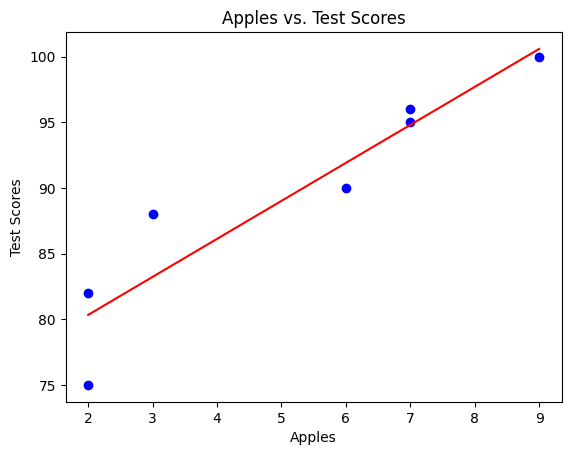

In [ ]:
# Let's plot these results

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], y, color='blue')  # Plotting the data points
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_pred_1 = reg.intercept_ + reg.coef_[0] * x1_range  # Predicted y values based on the first feature
plt.plot(x1_range, y_pred_1, color='red')  # Plotting the regression line
plt.title('Apples vs. Test Scores')
plt.xlabel('Apples')
plt.ylabel('Test Scores')

plt.show()

In [ ]:
# Let's say though that you are additionally pretty sure that if you eat less
# bananas, you do better. So now we have two features to consider per quiz score
# (amounts of apples and bananas)

X = np.array([[6, 5], [3, 7], [2, 8], [7, 3], [9, 2], [2, 8], [7, 4]])

# We don't need to reshape because it's clearer to the model what's a feature
# and what's a sample.

model = LinearRegression()
reg = model.fit(X, y)

print('Score:', reg.score(X, y))
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

Score: 0.883111954459203
Coefficients: [ 0.4 -2.9]
Intercept: 102.70000000000002


There's a few changes to note with our additional data. Not only do we see an immediately better score, but we now have two coefficients. More apples are loosely positively correlated with higher test scores, whereas more bananas are very negatively correlated.

Because our bananas have such a big influence, our model would predict a (more than) perfect test score when we consume no bananas or apples.



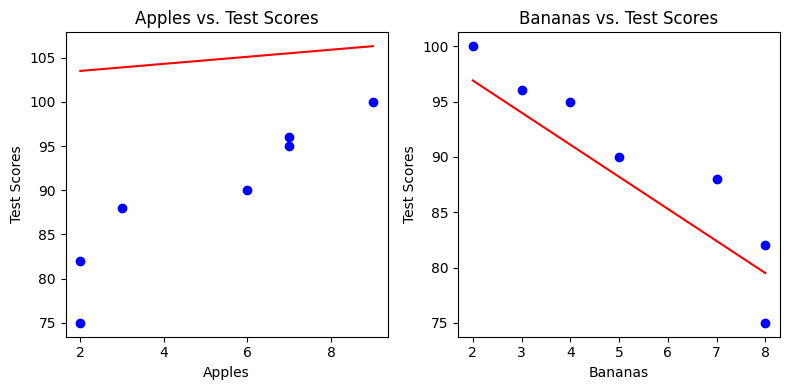

In [ ]:
# Let's plot these results side by side this time with the subplot function

import matplotlib.pyplot as plt

# Creating the figure and axes for the subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# Plot for the first feature
axs[0].scatter(X[:, 0], y, color='blue')  # Plotting the data points
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_pred_1 = reg.intercept_ + reg.coef_[0] * x1_range  # Predicted y values based on the first feature
axs[0].plot(x1_range, y_pred_1, color='red')  # Plotting the regression line
axs[0].set_title('Apples vs. Test Scores')
axs[0].set_xlabel('Apples')
axs[0].set_ylabel('Test Scores')

# Plot for the second feature
axs[1].scatter(X[:, 1], y, color='blue')  # Plotting the data points
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
y_pred_2 = reg.intercept_ + reg.coef_[1] * x2_range  # Predicted y values based on the second feature
axs[1].plot(x2_range, y_pred_2, color='red')  # Plotting the regression line
axs[1].set_title('Bananas vs. Test Scores')
axs[1].set_xlabel('Bananas')
axs[1].set_ylabel('Test Scores')

# Show the plots
plt.tight_layout()
plt.show()

##Fitting a Tuning Curve

In this example, we're taking a look at one theoretical neuron and its responses to a stimulus. Let's say this is a neuron in V1 and it prefers to respond to a bar with an orientation of 0 degrees. We'll record some spikes from it when the orientation is farther away from 0, but not as much.

To illustrate this, we're first going to generate a typical Gaussian distribution and adding a little bit of noise to it to make some "realistic" neural spiking data.

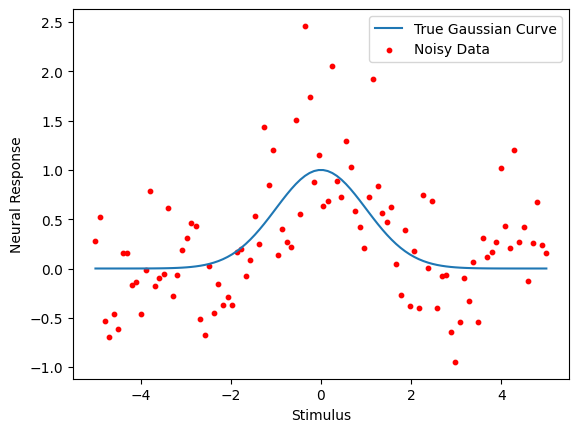

In [ ]:
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-((x - mu)**2) / (2 * sigma**2))

mu = 0  # Mean of the Gaussian (e.g., preferred stimulus)
sigma = 1  # Standard deviation of the Gaussian
amplitude = 1  # Amplitude of the Gaussian

# Generate synthetic data
x_values = np.linspace(-5, 5, 100)  # Stimulus values
true_responses = gaussian(x_values, mu, sigma, amplitude)  # True responses without noise
noisy_responses = true_responses + np.random.normal(0, 0.5, len(true_responses))  # Add Gaussian noise

# Plot the synthetic data
plt.plot(x_values, true_responses, label='True Gaussian Curve')
plt.scatter(x_values, noisy_responses, color='red', s=10, label='Noisy Data')
plt.xlabel('Stimulus')
plt.ylabel('Neural Response')
plt.legend()
plt.show()

Now that we've generated our data, we're going to fit a curve to it. The last problem was a linear least-squares problem which we can work with by fitting a linear regression model. This however we're gonna consider to be a non-linear least-squares problem, so a better tactic is **gradient descent**.

In gradient descent, we construct a loss function which compares our estimated curve with the actual data, same as in linear regression. In a gaussian model, we can vary the mean, sigma, and amplitude to find the best fit, so for this example we'll have 3 separate loss functions.

Then, we're going to take the derivative of each loss function with respect to its parameter to get its gradient. Gradients are vector fields which point in the direction of the greatest increase of a function. So if you base your loss function on the right idea (minimizing the distance between our actual and predicted data), the gradient is a nice map to the best solution.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/700px-Gradient_descent.svg.png" alt="drawing" width="300"/>

Iteration 0, Cost: 23.45846003863395
Iteration 100, Cost: 24.55424003533807
Iteration 200, Cost: 24.738663100569227
Iteration 300, Cost: 24.75488619201687
Iteration 400, Cost: 24.75651302265566
Iteration 500, Cost: 24.756696794367425
Iteration 600, Cost: 24.756719045808623
Iteration 700, Cost: 24.75672183409697
Iteration 800, Cost: 24.756722189004083
Iteration 900, Cost: 24.756722234490294


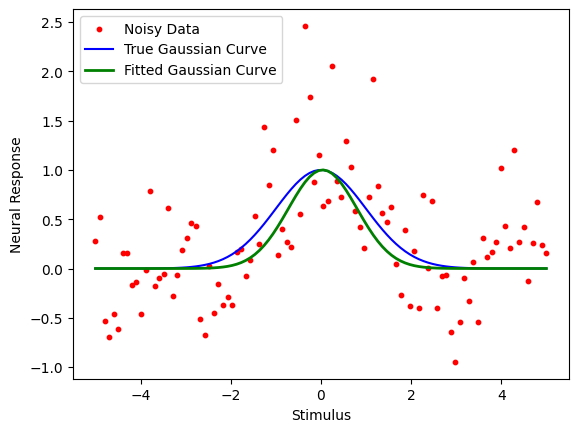

In [ ]:

# Derivatives of the Gaussian function with respect to its parameters
def d_gaussian_mu(x, mu, sigma, amplitude):
    return gaussian(x, mu, sigma, amplitude) * ((x - mu) / sigma**2)

def d_gaussian_sigma(x, mu, sigma, amplitude):
    return gaussian(x, mu, sigma, amplitude) * (((x - mu)**2) / sigma**3 - 1/sigma)

def d_gaussian_amplitude(x, mu, sigma, amplitude):
    # derivative with respect to amplitude is the gaussian without the amplitude
    return gaussian(x, mu, sigma, 0)

# Cost function (sum of squared errors)
def cost_function(x, y, mu, sigma, amplitude):
    predictions = gaussian(x, mu, sigma, amplitude)
    return np.sum((y - predictions)**2)

# Gradient descent function to update parameters
def gradient_descent(x, y, mu, sigma, amplitude, learning_rate, iterations):
    for i in range(iterations):
        # Calculate the gradients
        d_cost_d_mu = -2 * np.sum((y - gaussian(x, mu, sigma, amplitude)) \
                                  * d_gaussian_mu(x, mu, sigma, amplitude))
        d_cost_d_sigma = -2 * np.sum((y - gaussian(x, mu, sigma, amplitude)) \
                                     * d_gaussian_sigma(x, mu, sigma, amplitude))
        d_cost_d_amplitude = -2 * np.sum((y - gaussian(x, mu, sigma, amplitude)) \
                                         * d_gaussian_amplitude(x, mu, sigma, amplitude))

        # Update the parameters
        mu -= learning_rate * d_cost_d_mu
        sigma -= learning_rate * d_cost_d_sigma
        amplitude -= learning_rate * d_cost_d_amplitude

        # Print the cost every so often
        if i % 100 == 0:
            current_cost = cost_function(x, y, mu, sigma, amplitude)
            print(f"Iteration {i}, Cost: {current_cost}")

    return mu, sigma, amplitude


initial_mu = 0
initial_sigma = 1
initial_amplitude = 1

# There's no closed-form solution to this problem because it's noisy data.
# Instead, we take little steps in the right direction, reorienting ourselves
# every time.
learning_rate = 0.001
iterations = 1000

# Run gradient descent
fitted_mu, fitted_sigma, fitted_amplitude = gradient_descent(x_values,
                                                             noisy_responses,
                                                             initial_mu,
                                                             initial_sigma,
                                                             initial_amplitude,
                                                             learning_rate, iterations)

# Generate the fitted Gaussian curve
fitted_responses = gaussian(x_values, fitted_mu, fitted_sigma, fitted_amplitude)

# Plot the results
plt.scatter(x_values, noisy_responses, color='red', s=10, label='Noisy Data')
plt.plot(x_values, true_responses, color='blue', label='True Gaussian Curve')
plt.plot(x_values, fitted_responses, color='green', label='Fitted Gaussian Curve', linewidth=2)
plt.xlabel('Stimulus')
plt.ylabel('Neural Response')
plt.legend()
plt.show()


Okay but realistically, you're not going to make this from scratch -- a ton of libraries implement this for you. Here's a simpler example with the same data.

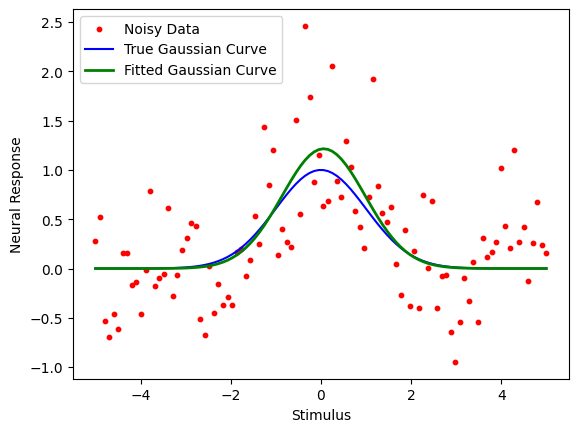

In [ ]:
from scipy.optimize import curve_fit

# You don't need to add an initial guess for good results in such a simple case
# but I wanted to show that this is available.
initial_guess = [0, 1, 1]  # Initial guess for the parameters [mu, sigma, amplitude]
params, covariance = curve_fit(gaussian, x_values, noisy_responses, p0=initial_guess)
# Extract the fitted parameters
fitted_mu, fitted_sigma, fitted_amplitude = params

# Generate the fitted Gaussian curve
fitted_responses = gaussian(x_values, fitted_mu, fitted_sigma, fitted_amplitude)

plt.scatter(x_values, noisy_responses, color='red', s=10, label='Noisy Data')
plt.plot(x_values, true_responses, color='blue', label='True Gaussian Curve')
plt.plot(x_values, fitted_responses, color='green', label='Fitted Gaussian Curve', linewidth=2)
plt.xlabel('Stimulus')
plt.ylabel('Neural Response')
plt.legend()
plt.show()

You might notice a slightly different result for these models because the scipy method has more sophisticated optimization and different initial parameters (like number of iterations, step size, etc.)

If you're curious the documentation for these methods is pretty detailed: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html